<a href="https://colab.research.google.com/github/emaudealtema/Data-Mining/blob/main/Regroupement_daset_diab%C3%A8te.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from plotnine import *
#from sklearn.mixture import GausianMixture

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [ ]:
# charger et nettoyer les donnees
donnee =pd.read_csv('/content/drive/MyDrive/Dataset/diabetes.csv')
donnee.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
nouveau_dataset = donnee.iloc[:, [7,0,2,3,4,1]].values
nouveau_dataset

array([[ 50,   6,  72,  35,   0, 148],
       [ 31,   1,  66,  29,   0,  85],
       [ 32,   8,  64,   0,   0, 183],
       ...,
       [ 30,   5,  72,  23, 112, 121],
       [ 47,   1,  60,   0,   0, 126],
       [ 23,   1,  70,  31,   0,  93]])

In [ ]:
df = pd.DataFrame(nouveau_dataset)
df.columns = ['Age', 'Pregnancies', 'BloodPressure','SkinThickness','Insulin','Glucose']
df.head()

,Age,Pregnancies,BloodPressure,SkinThickness,Insulin,Glucose
0,50,6,72,35,0,148
1,31,1,66,29,0,85
2,32,8,64,0,0,183
3,21,1,66,23,94,89
4,33,0,40,35,168,137


In [ ]:
#  pour effacer une colonne dans un dataframe
#df = df.drop('Age', axis = 0)

In [ ]:
# Handling the missing values
df.fillna(method ='ffill', inplace = True)

In [ ]:
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
df_normalized = normalize(df_scaled)

In [ ]:
# Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)

In [ ]:
#Reducing the dimensionality of the Data

pca = PCA(n_components = 2)
df_principal = pca.fit_transform(df_normalized)
df_principal = pd.DataFrame(df_principal)
df_principal.columns = ['BloodPressure', 'Insulin']

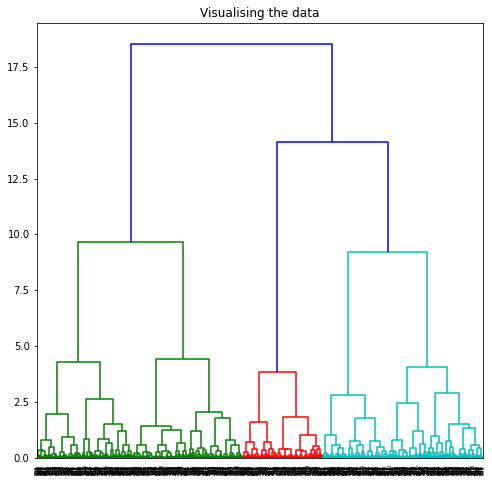

In [ ]:
#Dendograms are used to divide a given cluster into many different clusters.

#Step 5: Visualizing the working of the Dendograms

plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df_principal, method ='ward', metric = 'euclidean')))

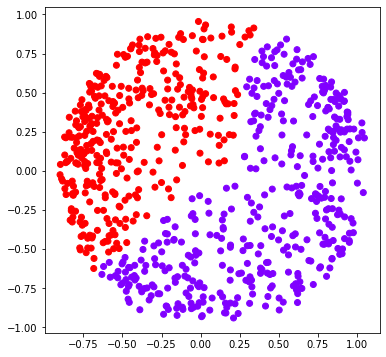

In [ ]:
#K = ( On note que AgglomerativeClutering prend 3 parametres n_clusters = nombre de cluster, affinity = distance entre 2 points  souvent on utilise
#euclidean mais il pouvait cosine ou la distance de mannhathan # et linkage qui prend ward methode comme distance entre 2 clusters
ac2 = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='ward')
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(df_principal['BloodPressure'], df_principal['Insulin'], 
           c = ac2.fit_predict(df_principal), cmap ='rainbow')
plt.show()

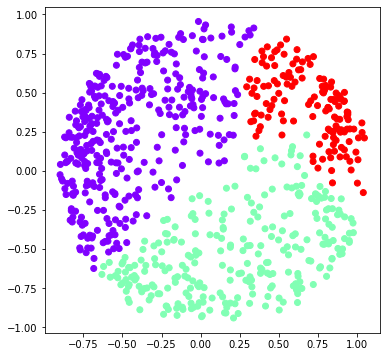

In [ ]:
#K = 3 i.e nombre de cluster
ac3 = AgglomerativeClustering(n_clusters = 3)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(df_principal['BloodPressure'], df_principal['Insulin'], 
           c = ac3.fit_predict(df_principal), cmap ='rainbow')
plt.show()

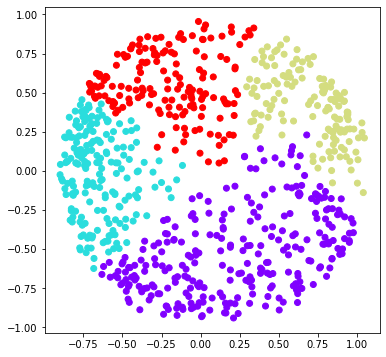

In [ ]:
# K = 4

ac4 = AgglomerativeClustering(n_clusters = 4)
  
plt.figure(figsize =(6, 6))
plt.scatter(df_principal['BloodPressure'], df_principal['Insulin'],
            c = ac4.fit_predict(df_principal), cmap ='rainbow')
plt.show()

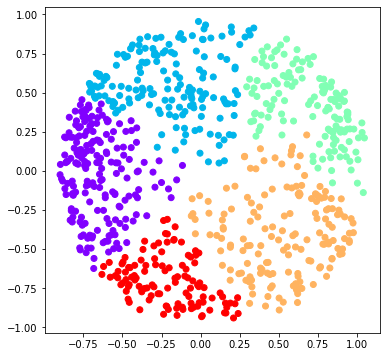

In [ ]:
#K = 5 i.e nombre de cluster
ac5 = AgglomerativeClustering(n_clusters = 5)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(df_principal['BloodPressure'], df_principal['Insulin'], 
           c = ac5.fit_predict(df_principal), cmap ='rainbow')
plt.show()

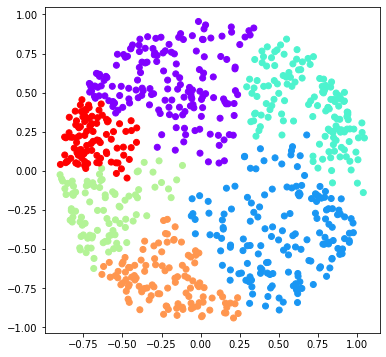

In [ ]:
#K = 6 i.e nombre de cluster
ac6 = AgglomerativeClustering(n_clusters = 6)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(df_principal['BloodPressure'], df_principal['Insulin'], 
           c = ac6.fit_predict(df_principal), cmap ='rainbow')
plt.show()

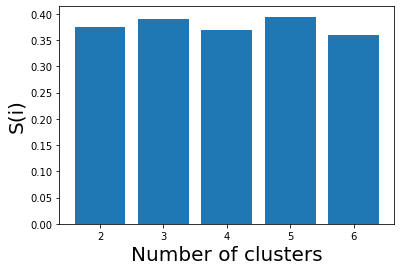

In [ ]:
k = [2, 3, 4, 5, 6]
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(df_principal, ac2.fit_predict(df_principal)))
silhouette_scores.append(
        silhouette_score(df_principal, ac3.fit_predict(df_principal)))
silhouette_scores.append(
        silhouette_score(df_principal, ac4.fit_predict(df_principal)))
silhouette_scores.append(
        silhouette_score(df_principal, ac5.fit_predict(df_principal)))
silhouette_scores.append(
        silhouette_score(df_principal, ac6.fit_predict(df_principal)))
  
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()